## Example plot for LFPy: Single-synapse contribution to the LFP
* https://github.com/LFPy/LFPy/blob/master/examples/example_anisotropy.py

```
Copyright (C) 2017 Computational Neuroscience Group, NMBU.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.
```

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from os.path import join


--No graphics will be displayed.


In [2]:
cell_parameters = {          # various cell parameters,
    # Mainen&Sejnowski, 1996
    'morphology': join('morphologies', 'ball_and_stick.hoc'),
    'passive_parameters': {"g_pas": 1 / 30000., "e_pas": -70},
    'cm': 1.0,         # membrane capacitance
    'Ra': 150,        # axial resistance
    'v_init': -65.,    # initial crossmembrane potential
    'passive': True,   # switch on passive mechs
    'nsegs_method': 'lambda_f',
    'lambda_f': 1000.,
    'dt': 2.**-2,      # simulation time step size
    'tstart': -10.,    # start time of simulation, recorders start at t=0
    'tstop': 10.,   # stop simulation at 200 ms. These can be overridden
    # by setting these arguments i cell.simulation()
}

In [3]:

# Create cell
cell = LFPy.Cell(**cell_parameters)
cell.set_pos(z=-10)

In [4]:

synapse_parameters = {
    'idx': 0,
    'e': 0.,                   # reversal potential
    'syntype': 'ExpSyn',       # synapse type
    'tau': 5.,                 # synaptic time constant
    'weight': .001,            # synaptic weight
    'record_current': False,    # record synapse current
}

In [5]:
# Create synapse and set time of synaptic input
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([5.]))

In [6]:
# Create a grid of measurement locations, in (um)
X, Z = np.mgrid[-100:101:2, -100:200:2]
Y = np.zeros(X.shape)


In [7]:
sigma = 0.3
sigma_tensor = [0.3, 0.3, 0.45]

In [8]:
# Define electrode parameters
grid_electrode_parameters = {
    'sigma': sigma,      # extracellular conductivity
    'x': X.flatten(),  # electrode requires 1d vector of positions
    'y': Y.flatten(),
    'z': Z.flatten(),
    'method': 'root_as_point'
}

grid_electrode_parameters_tensor = {
    'sigma': sigma_tensor,      # extracellular conductivity
    'x': X.flatten(),  # electrode requires 1d vector of positions
    'y': Y.flatten(),
    'z': Z.flatten(),
    'method': 'root_as_point'
}


In [10]:
# Run simulation, electrode object argument in cell.simulate
cell.simulate(rec_imem=True)
print("running simulation...")

running simulation...


In [11]:

# Create electrode objects

grid_electrode = LFPy.RecExtElectrode(cell, **grid_electrode_parameters)
grid_electrode.data = grid_electrode.get_transformation_matrix() @ cell.imem

grid_electrode_tensor = LFPy.RecExtElectrode(
    cell, **grid_electrode_parameters_tensor)
grid_electrode_tensor.data = \
    grid_electrode_tensor.get_transformation_matrix() @ cell.imem

Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-distance to root segments
Adjusting r-

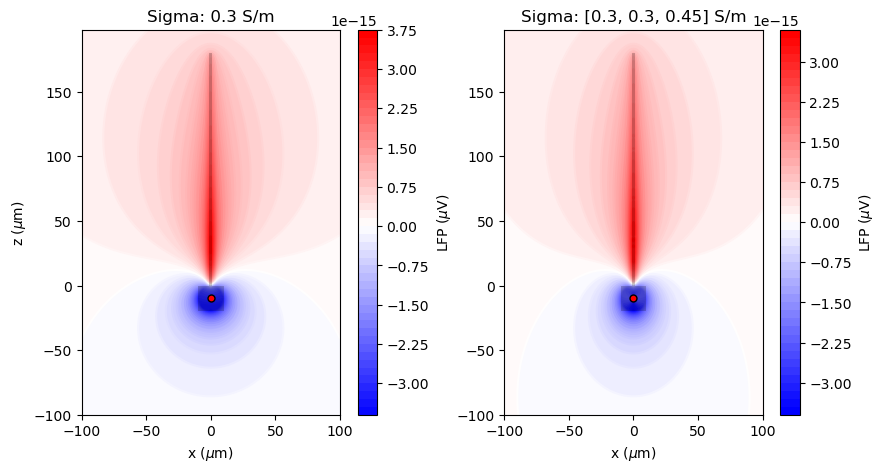

In [12]:

fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(121, aspect='equal',
                     xlabel='x ($\\mu$m)', ylabel='z ($\\mu$m)',
                     title="Sigma: %s S/m" % str(sigma),
                     ylim=[np.min(grid_electrode.z), np.max(grid_electrode.z)],
                     xlim=[np.min(grid_electrode.x), np.max(grid_electrode.x)])

max_idx = np.argmax(np.abs(cell.imem[0, :]))

LFP = 1000 * grid_electrode.data[:, max_idx].reshape(X.shape)
im = ax.contourf(X, Z, LFP, 51,
                 vmin=-np.max(np.abs(LFP)) / 1, vmax=np.max(np.abs(LFP)) / 1,
                 cmap='bwr',
                 zorder=-2)
ax.contour(X, Z, LFP, 51,
           vmin=-np.max(np.abs(LFP)) / 1, vmax=np.max(np.abs(LFP)) / 1,
           cmap='bwr',
           zorder=-2)

cbar = plt.colorbar(im)
cbar.set_label(r'LFP ($\mu$V)')

# plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips, alpha=0.2,
                         edgecolors='none',
                         facecolors='k')
ax.add_collection(polycol)


ax.plot(synapse.x, synapse.z, 'o', ms=5,
        markeredgecolor='k',
        markerfacecolor='r')

ax2 = fig.add_subplot(122, aspect='equal', xlabel='x ($\\mu$m)',
                      title="Sigma: %s S/m" % str(sigma_tensor),
                      ylim=[np.min(grid_electrode.z),
                            np.max(grid_electrode.z)],
                      xlim=[np.min(grid_electrode.x),
                            np.max(grid_electrode.x)])

LFP = 1000 * grid_electrode_tensor.data[:, max_idx].reshape(X.shape)
im = ax2.contourf(X, Z, LFP, 51,
                  vmin=-np.max(np.abs(LFP)) / 1, vmax=np.max(np.abs(LFP)) / 1,
                  cmap='bwr',
                  zorder=-2)
ax2.contour(X, Z, LFP, 51,
            vmin=-np.max(np.abs(LFP)) / 1, vmax=np.max(np.abs(LFP)) / 1,
            cmap='bwr',
            zorder=-2)

cbar = plt.colorbar(im)
cbar.set_label(r'LFP ($\mu$V)')
# plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips,
                         edgecolors='none', alpha=0.2,
                         facecolors='k')
ax2.add_collection(polycol)


ax2.plot(synapse.x, synapse.z, 'o', ms=5,
         markeredgecolor='k',
         markerfacecolor='r')

# plt.savefig('example_anisotropy.pdf', dpi=150)

plt.show()